

<div align="left"><img src="https://msu-cmse-courses.github.io/cmse202-U25-jb/_static/logo.png" alt="cmse logo" width=200></div>

# CMSE 202 - Summer Session 2 - 2025
## Homework Assignment 3 - Graph Theory
 

### <p style="text-align: right;"> &#9989; Pranaov</p>




In this homework, we will look at a dataset which contains the final score of all NCAA football games between Football Bowl Subdivision (FBS) teams during the 2023 regular season. We will model this data as a directed graph where each team is a node, and for each game, there is a directed edge from the winning team to the losing team. 

So for example, if we only had four teams (Team A, Team B, Team C, and Team D) and Team A beat Team B, Team A beat Team C, Team B beat Team C, and Team C beat Team D, our directed graph would look like this: 

<img src="https://i.ibb.co/VvKLQYy/Four-Team-Graph.png" width=150px align="center">

However, since there are several FBS teams and several games between them, our directed graph will actually have a lot more nodes and edges. Here's a pretty graph that someone else made with a similar but different dataset. <img src="http://blogs.acu.edu/coba/files/2016/12/ncaa-football-diagram-490x376.jpg" width=400px align="center" alt="Image credit: https://blogs.acu.edu/">

For those of you who don't know much about football or even sports in general, don't panic. No intricate sports knowledge is needed.

Technical note for sports fans: The dataset you will be using only include games where both teams are in the FBS. So for example, the game between `"Michigan State"` and `"Richmond"` is not in the dataset since `"Richmond"` is an FCS team.

&#9989;  **Question 1 (3 points)**: For convenience, you are provided with a file called `NCAAFootballScores2023.csv`, which you can download from here: 

`https://raw.githubusercontent.com/yangy5/HWFiles/main/NCAAFootballScores2023.csv`

Each row contains data from one game between two FBS teams. The first column contains the date that the game was played. The second and fourth columns contain the names of the home team and the away team respectively. The third and fifth columns contain the number of points that the home team and the away team scored respectively. 

**Do This:** Load the data in this file into a `Pandas` `DataFrame`, and **give the columns appropriate titles**. Display the first few and last few rows of the `DataFrame`. 

In [3]:
# Put your code for Question 1 here:
import pandas as pd
columns = ['Date','Home Team','Home Team Score','Away Team','Away Team Score']
data = pd.read_csv('NCAAFootballScores2023.csv',names=columns)
data.head()

,Date,Home Team,Home Team Score,Away Team,Away Team Score
0,8/26,Jacksonville State,17,Texas-El Paso,14
1,8/26,Louisiana Tech,22,Florida International,17
2,8/26,New Mexico State,30,Massachusetts,41
3,8/26,Notre Dame,42,Navy,3
4,8/26,San Diego State,20,Ohio,13


Next, you will construct the directed graph to represent this data.

&#9989;  **Question 2 (5 points)**: Create an empty `DiGraph` object from the `networkx` package. For each row of the `DataFrame`, add a directed edge from the node corresponding to the winning team (the one with the larger score) to the node corresponding to the losing team (the one with the smaller score). Note that there are no ties in college football.

Remember that each edge in a directed graph has an orientation. So adding an edge from node A to node B is not the same thing as adding an edge from node B to node A. 

In [24]:
# Put your code for Question 2 here:
import networkx as nx
G = nx.DiGraph()

for index, row in data.iterrows():
    home_team =row['Home Team']
    home_score=row['Home Team Score']
    away_team =row['Away Team']
    away_score =row['Away Team Score']
    
    if home_score> away_score:
        winner =home_team
        loser =away_team
    else:  
        winner =away_team
        loser =home_team
    
    G.add_edge(winner, oser)

NameError: name 'oser' is not defined

This graph has over 100 nodes and hundreds of edges, so it will be hard to look at the entire graph at once. But we can construct and display a small subgraph of the entire directed graph.

&#9989;  **Question 3 (7 points)**: The cell below contains code which creates a dictionary whose keys are the names of the teams in the Big Ten Conference (yes, there are more than 10 teams in this dictionary) and whose values are tuples of coordinates. 

**Do the following**: 
* Using the `subgraph()` method in the `networkx` package, create another `DiGraph` object which is the subgraph of  induced by the nodes in the keys of the dictionary below. In other words, this subgraph should have only the nodes corresponding to the Big Ten teams and only the edges between teams in the Big Ten. 
* Then, draw this subgraph where each node is labeled with the team name and is at the position in the dictionary. 
* Finally, explicitly set the colors of the nodes, edges, and labels to any color scheme that you like. 

If you do this part correctly, you should get something that looks like this: <img src="https://i.ibb.co/FDQtG4J/Big-Ten-Subgraph.png" width=400px align="center">

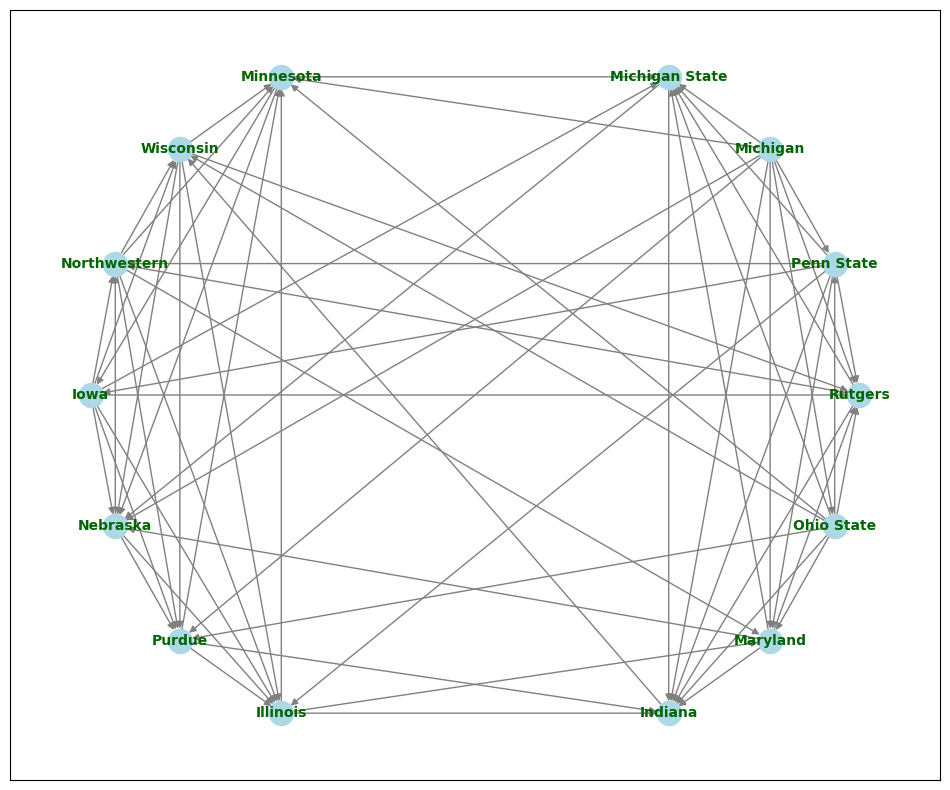

In [11]:
# Put your code for Question 3 here:
import matplotlib.pyplot as plt 
BigTen_positions = {"Michigan State":(0.63,0.92),"Michigan":(0.96,0.71),"Penn State":(1.17,0.38),"Rutgers":(1.25,0.0),
                    "Ohio State":(1.17,-0.38),"Maryland":(0.96,-0.71),"Indiana":(0.63,-0.92),
                    "Illinois":(-0.63,-0.92),"Purdue":(-0.96,-0.71),"Nebraska":(-1.17,-0.38),
                    "Iowa":(-1.25,0.0),"Northwestern":(-1.17,0.38),"Wisconsin":(-0.96,0.71),"Minnesota":(-0.63,0.92)}
big_ten = list(BigTen_positions.keys())
G_bigten = G.subgraph(big_ten).copy()
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G_bigten, BigTen_positions, node_color='lightblue')
nx.draw_networkx_edges(G_bigten, BigTen_positions,edge_color='gray',arrows=True)
nx.draw_networkx_labels(G_bigten, BigTen_positions,font_size=10,font_color='darkgreen', font_weight='bold')
plt.show()

&#9989;  **Question 4 (6 points total)**: For each part of Question 3.4, use either or both of the `DiGraph` objects you created along with a short amount of networkx code to find answer. **Note that you must use a networkx method to receive credit, and answers based on using the original csv file, the DataFrame, or by simply looking at the plot in Question 3 will not receive credit.**

**Question 4.1 (1 point)**: What is total number of FBS teams?

**Question 4.2 (1 point)**: What is total number of Big Ten teams?

**Question 4.3 (1 point)**: How many games did `"Michigan State"` play against Big Ten teams?

**Question 4.4 (1 point)**: How many games did `"Wisconsin"` win against FBS teams?

**Question 4.5 (1 point)**: How many games did `"Indiana"` lose against Big Ten teams?

**Question 4.6 (1 point)**: True or False?: `"Miami (Florida)"` lost to `"Georgia Tech"`. Note that these are not Big Ten teams. 

If you get stuck, look through the [`networkx` `DiGraph` documentation](https://networkx.org/documentation/stable/reference/classes/digraph.html) and/or think carefully about how teams and game results are represented in the two `DiGraph` objects. Searching the `networkx` documentation for some of the following terms will be helpful: "nodes", "has edge", "degree", "in degree", "out degree". Also, think carefully about whether you need to use the full graph with all the FBS teams or the subgraph with just the Big Ten teams for each question.

In [13]:
# Question 4.1: What is total number of FBS teams?
print(G.number_of_nodes())

133


In [14]:
# Question 4.2: What is total number of Big Ten teams?
print(G_bigten.number_of_nodes())

14


In [15]:
# Question 4.3: How many games did "Michigan State" play against Big Ten teams?
print(G_bigten.degree("Michigan State"))

9


In [16]:
# Question 4.4: How many games did "Wisconsin" win against FBS teams?
print(G.out_degree("Wisconsin"))

7


In [17]:
# Question 4.5: How many games did "Indiana" lose against Big Ten teams?
print(G_bigten.in_degree("Indiana"))

8


In [18]:
# Question 4.6: True or False?: "Miami (Florida)" lost to "Georgia Tech". Note that these are not Big Ten teams.
print(G.has_edge("Georgia Tech", "Miami (Florida)"))

True


&#9989;  **Question 5 (5 points)**: There are over 100 FBS teams, but each team only gets to play a few of the other teams. However, fans still want to be able to argue that their team is better than another team, even if their team didn't play and beat that other team. One way to do this is using the "transitive property". For example, if Team A beat Team B and Team B beat Team C, then Team A's fans can say "Since Team A is better than Team B, and Team B is better than Team C, Team A must be better than Team C." 

This isn't a perfectly logical argument since there is some luck in sports, and so the "better" team doesn't always win. Furthermore, if Team A beats Team B, Team B beats Team C, and Team C beats Team A, then the fanbases of all three teams can argue that their team is better than a team they lost to. Of course, arguments about sports are often not based on logic. :P

We can extend this "transitive property"-based reasoning by using more intermediate teams. In general, if Team $A_0$ beat Team $A_1$, Team $A_1$ beat Team $A_2$, ..., and Team $A_{n-1}$ beat Team $A_n$, then Team $A_0$'s fans can claim that Team $A_0$ is better than Team $A_n$. Obviously, the more intermediate teams you need, the less credible the argument sounds. The website https://www.myteamisbetterthanyourteam.com/ helps fans find a shortest path of comparisons to claim that their team is better than someone else's team. 

**Do this**: Our goal is to make a function that takes in the directed graph that you created along with two strings called `my_team` and `their_team`, and then prints a sequence of statements of the form "[TEAM NAME] beat [TEAM NAME]" which can be used to argue that `my_team` is better than `their team` (assuming such a sequence exists). To do this, the function will first use the `shortest_path()` method to generate a list of teams $[A_0,A_1,\ldots,A_n]$ which forms the shortest path from `my_team` to `their_team`. Then, it will iterate through this list to print out the sequence of statements "Team $A_i$ beat Team $A_{i+1}$".

In [22]:
# Put your code for Question 5 here:
def find_argument(digraph,my_team,their_team): # Don't change this line
    path = nx.shortest_path(digraph, my_team, their_team)
    for i in range(len(path)- 1):
        team1 = path[i]
        team2 = path[i+1]
        print(team1, " Beat ",team2)

**Do This**: Test out your `find_argument()` method by running the cell below. The first few lines of the output should look something like this:


Michigan State is better than Alabama because ...  
Michigan State beat Central Michigan  
Central Michigan beat South Alabama  
South Alabama beat Oklahoma State  
Oklahoma State beat Oklahoma  
Oklahoma beat Texas  
Texas beat Alabama  


In [21]:
# Replace the variable "digraph" with whatever you called your DiGraph with all FBS teams
print("Michigan State is better than Alabama because ...")
find_argument(G,"Michigan State","Alabama")
print("\nMichigan State is better than Minnesota because ...")
find_argument(G,"Michigan State","Minnesota")
print("\nMiddle Tennessee State is better than Missouri because ...")
find_argument(G,"Middle Tennessee State","Missouri")
print("\nMissouri is better than Middle Tennessee State because ...")
find_argument(G,"Missouri","Middle Tennessee State")
# Replace the variable "digraph" with whatever you called your DiGraph with all FBS teams

Michigan State is better than Alabama because ...
Michigan State  Beat  Central Michigan
Central Michigan  Beat  South Alabama
South Alabama  Beat  Oklahoma State
Oklahoma State  Beat  Oklahoma
Oklahoma  Beat  Texas
Texas  Beat  Alabama

Michigan State is better than Minnesota because ...
Michigan State  Beat  Nebraska
Nebraska  Beat  Illinois
Illinois  Beat  Minnesota

Middle Tennessee State is better than Missouri because ...
Middle Tennessee State  Beat  Florida International
Florida International  Beat  North Texas
North Texas  Beat  Tulsa
Tulsa  Beat  Northern Illinois
Northern Illinois  Beat  Ohio
Ohio  Beat  Iowa State
Iowa State  Beat  Oklahoma State
Oklahoma State  Beat  Oklahoma
Oklahoma  Beat  Texas
Texas  Beat  Alabama
Alabama  Beat  Louisiana State
Louisiana State  Beat  Missouri

Missouri is better than Middle Tennessee State because ...
Missouri  Beat  Middle Tennessee State


&#9989;  **Question 6 (5 points):** A graph/network is said to have a "[community structure](https://en.wikipedia.org/wiki/Community_structure)" if the nodes can be partitioned into communities such that generally nodes are connected to a high percentage of other nodes in the same community and a low percentage of nodes in other communities. Many real world graphs/networks (particularly those modeling social networks) have a "community structure". By taking a graph and detecting which nodes are part of tightly connected communities, we can often gain valuable insights into our graph. 


Most NCAA Football Bowl Subdivision teams are organized into conferences with 8 to 14 teams per conference. Typically, teams which are part of a conference will play most or all of the other teams in their conference and only a few teams outside their conference. Hence, the graph we generated with all the FBS teams will have this community structure. The pretty graph at the beginning of Part 3 is a good visualization of this structure.

Of course, we can easily look up which teams were in which conferences during the 2023 football season. However, let's see how easily we can detect this from the data. The Louvain method is one algorithm for community detection. If you are curious, you can read the Wikipedia article here https://en.wikipedia.org/wiki/Louvain_method, but it is not required.

**Do This:** First, make an undirected `Graph` that has the same nodes and edges as your `DiGraph` containing all FBS teams. There is a simple `networkx` `DiGraph` method to do this. Next, use the `louvain_communities()` method which is in the `community` subpackage of `networkx` to partition the graph into communities using the Louvain Community Detection Algorithm. The output of this method is a list of sets where each set represents a community. Finally, print the output of this algorithm.

You may want to read the documentation for the [`louvain_comminities()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) method.

In [23]:
# Put your code for Question 6 here:
from networkx.algorithms import community
undirected_graph = G.to_undirected()
communities = community.louvain_communities(undirected_graph)
for i, group in enumerate(communities):
    print(group)

{'Western Kentucky', 'Jacksonville State', 'Middle Tennessee State', 'New Mexico State', 'Texas-El Paso', 'Sam Houston State', 'Liberty', 'Louisiana Tech', 'Florida International'}
{'Auburn', 'Arkansas', 'Georgia', 'Texas A&M', 'Tennessee', 'Missouri', 'South Carolina', 'Alabama', 'Mississippi State', 'Florida', 'Vanderbilt', 'Louisiana State', 'Kentucky', 'Mississippi'}
{'Iowa State', 'Brigham Young', 'Baylor', 'Kansas State', 'Houston', 'Kansas', 'Central Florida', 'Texas', 'Oklahoma State', 'Cincinnati', 'Texas Christian', 'Oklahoma', 'Texas Tech', 'West Virginia'}
{'Clemson', 'Syracuse', 'Duke', 'Georgia Tech', 'Boston College', 'Virginia', 'North Carolina State', 'Louisville', 'Virginia Tech', 'Notre Dame', 'Pittsburgh', 'Miami (Florida)', 'Connecticut', 'North Carolina', 'Florida State', 'Wake Forest'}
{'UCLA', 'Stanford', 'Colorado', 'Washington State', 'Southern California', 'Washington', 'California', 'Arizona State', 'Utah', 'Arizona', 'Oregon', 'Oregon State'}
{'Ohio', 'Miam

&#9989;  **Question 7 (2 points):** What teams were detected to be in the same community as `"Michigan State"`? How well does this match up with the teams that are in the Big Ten Conference? Are there any teams included in the same community as `"Michigan State"` that are not part of the Big Ten Conference? Are there any teams in the Big Ten Conference that were not included in the same community as `"Michigan State"`? (See Question 3.3 if you forgot which teams are in the Big Ten Conference). 

**Optional:** Those of you who are either sports fans or interested in community detection may want to look at the other communities that were detected and see how those align with the FBS conferences for the 2023 season. 

teams: Wisconsin, Indiana, Maryland, Iowa, Penn State, Michigan, Northwestern, Rutgers, Nebraska, Illinois, Minnesota, Purdue, Michigan State, and Ohio State. it is a perfect match with the teams in the big ten conference. no teams included in the same community as "Michigan State" that are also not part of the Big Ten Conference.  there are no teams in the Big Ten Conference that were not included in the same community as "Michigan State"

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University